# *Bank Customer Churn Model*

1. CustomerId:- Unique identifier for each customer.
2. Surname:- Surname of each Customer.
3. CreditScore:- Credit Score of the Customer.
4. Geography:- Location of the Customer.
5. Gender:- Gender of Customer Male or Female.
6. Age:- Age of the customer.
7. Tenure:- Tenure of Customer.
8. Balance:- Balance Amount in Bank of Customer.
9. Num Of Products:- Numer of the product of the Customer.
10. Has Credit Card:- Customer has Cradit card or not(1 for Active, 0 for not Active).
11. Is Active Member:- Is Customer Active Member or not(1 for Active, 0 for not Active).
12. Estimated Salary:- Estimated Salary of the Customer.
13. Churn:- The target variable indicating whether the customer has churned (1 for churned, 0 for not churned).

This dataset provides a comprehensive view of various attributes related to the customers' banking activities. With these features, it becomes possible to build predictive models to identify potential churners based on historical and current customer behavior. The dataset's size allows for robust analysis and modeling to improve customer retention strategies.

1. Import Library

In [566]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

2. Import Data

In [567]:
data = pd.read_csv(r"C:\Users\indradeo\Pictures\Pictures\Downloads\Bank Churn Modelling.csv")
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [568]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [569]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Data Encoding

In [570]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [572]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [574]:
data.drop(['Surname'], inplace=True, axis=1)

In [575]:
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [576]:
data['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [577]:
data['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [578]:
data['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [579]:
data.replace({'Num Of Products':{1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [580]:
data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,619,France,Female,42,2,0.00,0,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,0,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,1,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,1,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,1,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,0,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,0,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,1,1,0,92888.52,1


In [581]:
data.loc[(data['Balance'] == 0), 'Churn'].value_counts() # Finding Number of Customer with 0 Balance. Customer with 0 Balance have higher chances of Churning

Churn
0    3117
1     500
Name: count, dtype: int64

In [582]:
data['ZeroBalance'] = np.where(data['Balance'] > 0, 1,0) #If 'Balance' is greater than 0 with 1 or 0. If the balance is 0 then they left the bank

data['ZeroBalance'].value_counts()

ZeroBalance
1    6383
0    3617
Name: count, dtype: int64

In [583]:
data = pd.get_dummies(data=data)

Data Visualization

In [584]:
data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,ZeroBalance,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,0,1,1,101348.88,1,0,True,False,False,True,False
1,15647311,608,41,1,83807.86,0,0,1,112542.58,0,1,False,False,True,True,False
2,15619304,502,42,8,159660.80,1,1,0,113931.57,1,1,True,False,False,True,False
3,15701354,699,39,1,0.00,1,0,0,93826.63,0,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,0,1,1,79084.10,0,1,False,False,True,True,False


<Axes: ylabel='Frequency'>

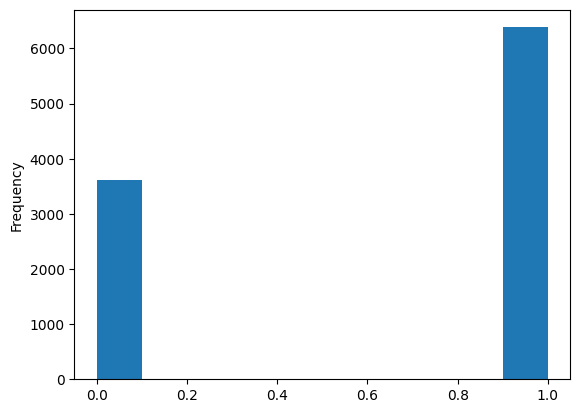

In [585]:
data.ZeroBalance.plot.hist()

In [586]:
data['ZeroBalance'].value_counts()

ZeroBalance
1    6383
0    3617
Name: count, dtype: int64

Text(0.5, 1.0, 'Corerelated With ZeroBalance')

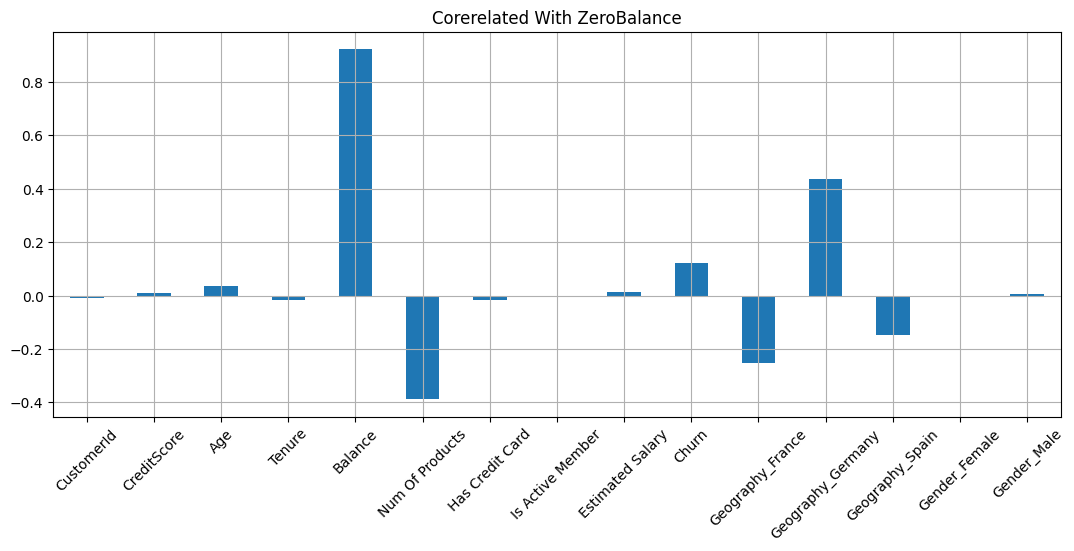

In [587]:
datast = data.drop(columns='ZeroBalance')
datast.corrwith(data['ZeroBalance']).plot.bar(figsize = (13,5), rot = 45, grid = True)
plt.title('Corerelated With ZeroBalance')



<Axes: >

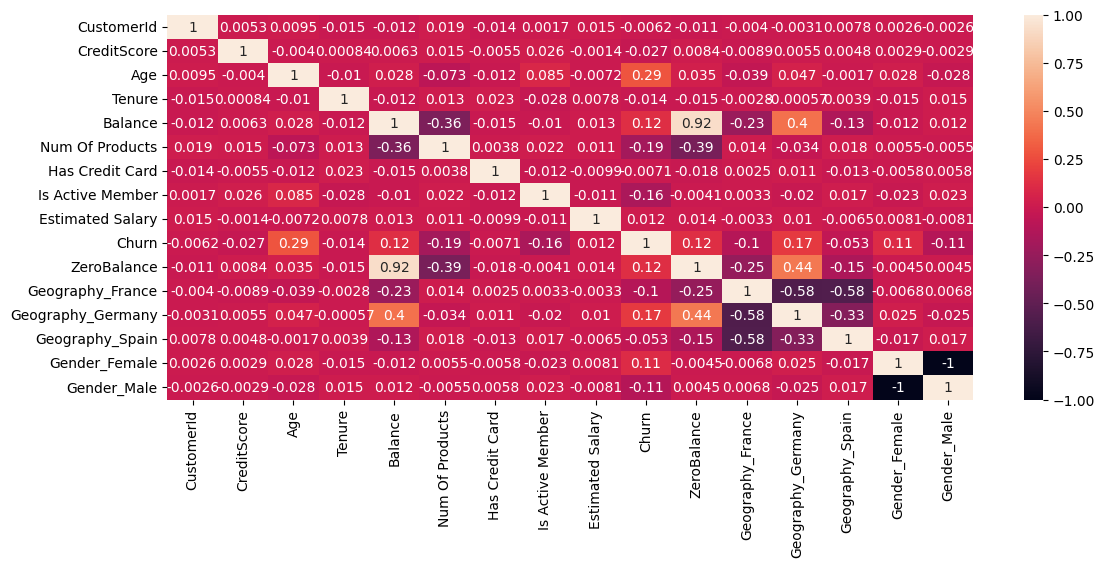

In [588]:
corr = data.corr()
plt.figure(figsize=(13,5))
sns.heatmap(corr, annot = True)

3. Define Target Variable (y) and Feature Variables (X)

In [589]:
data.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'ZeroBalance', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [590]:
y = data['ZeroBalance']
x = data.drop(['Churn','ZeroBalance'], axis=1)
x.shape, y.shape

((10000, 14), (10000,))

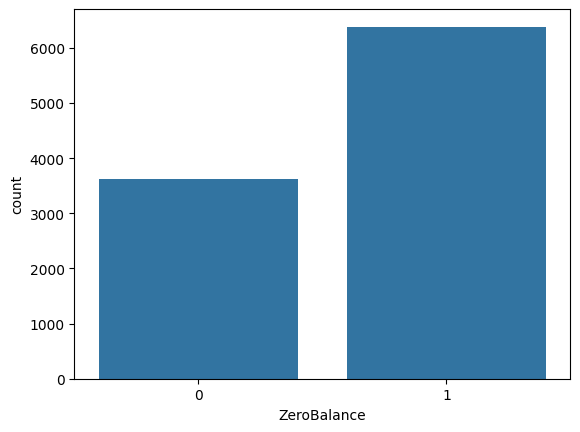

In [591]:
import seaborn as sns
sns.countplot(x = 'ZeroBalance', data= data);

In [592]:
y.value_counts()

ZeroBalance
1    6383
0    3617
Name: count, dtype: int64

4. Train Test Split

In [593]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=2529 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 14), (2000, 14), (8000,), (2000,))

Standardize Features

In [594]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train, x_test)

StandardScaler()

5. Modeling or Train 

In [595]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


In [596]:
model = []
model.append(('LR', LogisticRegression()))
model.append(('SVC', SVC()))
model.append(('LDA', LinearDiscriminantAnalysis()))
model.append(('DTC', DecisionTreeClassifier()))
model.append(('KNC', KNeighborsClassifier()))
#model.append(('GNB', GaussianNB()))
model

[('LR', LogisticRegression()),
 ('SVC', SVC()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('DTC', DecisionTreeClassifier()),
 ('KNC', KNeighborsClassifier())]

LR: 0.999875
SVC: 0.639375
LDA: 0.989125
DTC: 0.999875
KNC: 0.998875


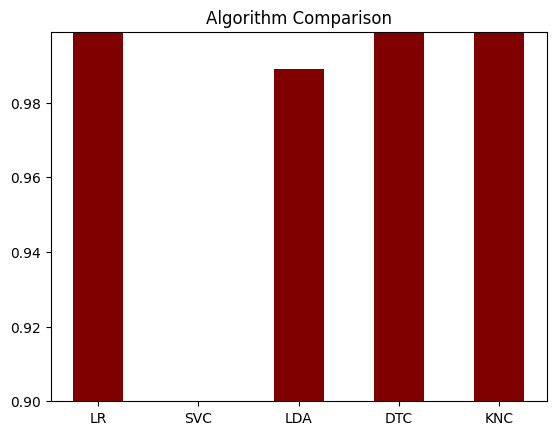

In [597]:
import matplotlib.pyplot as plt 

results = []
names = []
res = []

for name, model in model:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) # Setting up cross-validation with 10 splits
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy') # Evaluate model using cross-validation
    results.append(cv_results) # Store cross-validation results
    names.append(name) # Store model name
    res.append(cv_results.mean()) # Store mean accuracy
    print('%s: %f' % (name, cv_results.mean())) # Print the mean accuracy for the model

# Ploting
plt.ylim(0.900, 0.999)
plt.bar(names, res, color = 'maroon', width=0.5)
plt.title('Algorithm Comparison')
plt.show()




6. Model Evaluation or Testing the model/fit the model

In [598]:
from sklearn.svm  import SVC
model.fit(x_train, y_train)

KNeighborsClassifier()

7. Prediction

In [599]:
y_pred = model.predict(x_test)
print(y_pred)

[0 1 1 ... 0 0 1]


8. Model Accuracy

In [600]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       732
           1       1.00      1.00      1.00      1268

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [601]:
accuracy_score(y_test, y_pred)

0.9995

In [602]:
confusion_matrix(y_test, y_pred)

array([[ 732,    0],
       [   1, 1267]], dtype=int64)